# Python을 이용한 실습 - 220803


#### 19기 C1조 성민지
---

## 데이터 확인하기

In [16]:
# 필요한 라이브러리 불러오기

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 한글 깨짐 해결하기

matplotlib.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 처리

In [18]:
# 데이터 불러오기

titanic = pd.read_csv('/home/piai/다운로드/titanic.csv', encoding = 'euc-kr')

print(titanic.shape)
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터의 Pclass가 정수형으로 인식되어 있기 때문에 이를 범주형으로 변환해준다.

In [19]:
titanic['Pclass'] = titanic['Pclass'].astype('object')
titanic['Survived'] = titanic['Survived'].astype('object')
titanic['Fare'] = titanic['Fare'].astype('int64')

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S


In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int64  
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB


___

## 연속형 변수 확인하기


In [22]:
titanic_num = titanic[['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']]

In [23]:
titanic_num.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.758889,0.523008,0.381594,31.785634
std,257.353842,13.002570,1.102743,0.806057,49.703730
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.000000
50%,446.000000,30.000000,0.000000,0.000000,14.000000
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.000000


탑승객 나이의 평균은 약 30세이며, 1세 이하부터 많게는 80세까지 분포되어 있다.

### 연속형 변수의 결측치 처리하기

In [24]:
titanic_num.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

Age, SibSp, Parch, Fare에는 결측치가 없는 것으로 판단된다.

4개의 연속형 변수 모두 이상치를 가지고 있는 것으로 파악된다. 이상치를 포함하고 있는 행을 삭제하고자 한다.

### 연속형 변수의 분포 확인하기

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

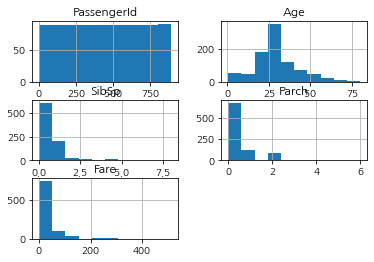

In [25]:
titanic_num.hist()

- 승객의 나이는 주로 20-30대에 분포해있다는 것을 확인할 수 있다.

---

## 범주형 변수 확인하기

In [26]:
titanic_cat = titanic[['PassengerId', 'Pclass', 'Sex', 'Embarked']]

### 범주형 변수의 결측치 처리하기

In [27]:
titanic_cat.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Embarked       2
dtype: int64

In [28]:
titanic_cat[titanic_cat['Embarked'].isnull() == True]

,PassengerId,Pclass,Sex,Embarked
61,62,1,female,NaN
829,830,1,female,NaN


3개의 범주형 변수 중 Embarked에서 결측값이 발견되었으며, 61행과 829행에서 Embarked의 결측값이 발견되었다. 이를 최빈값으로 대체하고자 한다.

In [29]:
titanic_cat = titanic_cat.fillna(titanic_cat.mode())

In [30]:
titanic_cat.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Embarked       2
dtype: int64

범주형 변수의 결측치가 잘 처리된 것을 확인할 수 있다.

In [31]:
print(titanic_cat.shape)
titanic_cat.head()

(891, 4)


,PassengerId,Pclass,Sex,Embarked
0,1,3,male,S
1,2,1,female,C
2,3,3,female,S
3,4,1,female,S
4,5,3,male,S


### 범주형 변수의 분포 확인하기

Text(0.5, 1.0, '승객의 탑승지 분포')

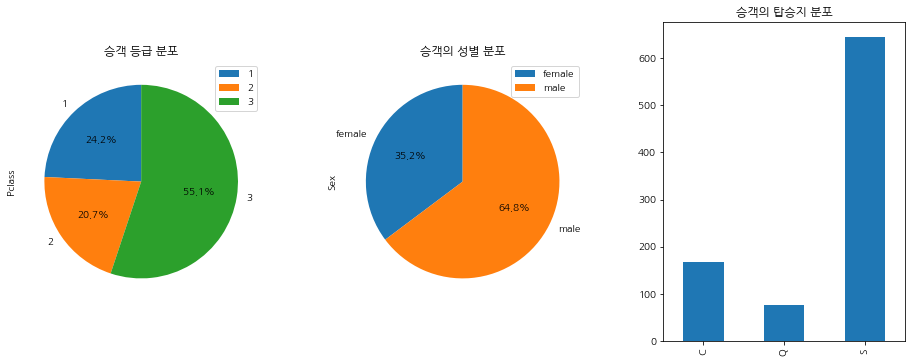

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
plt.tight_layout(w_pad = 5, h_pad = 5)

plt.subplot(1,3,1)
titanic_Pclass_count = titanic_cat['Pclass'].value_counts()
titanic_Pclass_count.sort_index(inplace = True)
titanic_Pclass_count.plot.pie(autopct = "%.1f%%", startangle = 90)
plt.legend()
plt.title('승객 등급 분포')

plt.subplot(1,3,2)
titanic_sex_count = titanic_cat['Sex'].value_counts()
titanic_sex_count.sort_index(inplace = True)
titanic_sex_count.plot.pie(autopct = "%.1f%%", startangle = 90)
plt.legend()
plt.title('승객의 성별 분포')

plt.subplot(1,3,3)
titanic_Embarked_count = titanic_cat['Embarked'].value_counts()
titanic_Embarked_count.sort_index(inplace = True)
titanic_Embarked_count.plot.bar()
plt.title('승객의 탑승지 분포')

- 탑승객의 절반은 3등석에 탑승하였으며, 1등석과 2등석에 탑승한 승객은 3등석의 약 절반에 해당한다.
- 탑승객 중 약 65%가 여성이고, 여성과 남성의 수가 크게 차이나지 않는다.
- 대부분의 승객이 S(Southampton)에서 탑승하였으며, C(Cherbourg)와 Q(Queenstown)에서 탑승한 승객의 수가 그 뒤를 따른다.

### 특성에 따른 생존 여부 파악하기

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S


In [34]:
titanic_target = titanic[['PassengerId', 'Survived']]
titanic_target.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [35]:
titanic_new = pd.merge(titanic_num, titanic_cat, on = 'PassengerId')
titanic_new = pd.merge(titanic_target, titanic_new, on = 'PassengerId')

In [36]:
print(titanic_new.shape)
titanic_new.head()

(891, 9)


,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked
0,1,0,22.0,1,0,7,3,male,S
1,2,1,38.0,1,0,71,1,female,C
2,3,1,26.0,0,0,7,3,female,S
3,4,1,35.0,1,0,53,1,female,S
4,5,0,35.0,0,0,8,3,male,S


/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '승객 등급별 생존 여부')

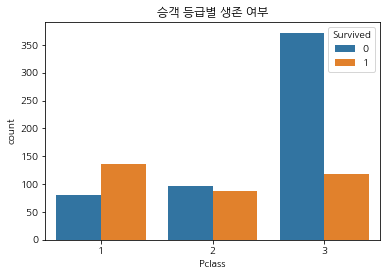

In [37]:
sns.countplot('Pclass', hue = 'Survived', data = titanic_new)
plt.title('승객 등급별 생존 여부')

상위 등급으로 갈수록 생존자의 비율이 높아진다는 것을 확인할 수 있다.

/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '성별 생존 여부')

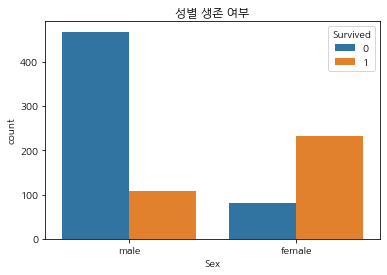

In [38]:
sns.countplot('Sex', hue = 'Survived', data = titanic_new)
plt.title('성별 생존 여부')

여성의 대다수가 생존한 반면에, 남성의 대다수는 생존하지 못했다는 것을 확인할 수 있다.